In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [43]:
# Import the ozone data
data = pd.read_csv('ozone.txt', sep=";", decimal=',')
data

,obs,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v,vent,pluie
0,601,87,15.6,18.5,18.4,4,4,8,0.6946,-1.7101,-0.6946,84,Nord,Sec
1,602,82,17.0,18.4,17.7,5,5,7,-4.3301,-4.0000,-3.0000,87,Nord,Sec
2,603,92,15.3,17.6,19.5,2,5,4,2.9544,1.8794,0.5209,82,Est,Sec
3,604,114,16.2,19.7,22.5,1,1,0,0.9848,0.3473,-0.1736,92,Nord,Sec
4,605,94,17.4,20.5,20.4,8,8,7,-0.5000,-2.9544,-4.3301,114,Ouest,Sec
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,925,84,13.3,17.7,17.8,3,5,6,0.0000,-1.0000,-1.2856,76,Sud,Sec
108,927,77,16.2,20.8,22.1,6,5,5,-0.6946,-2.0000,-1.3681,71,Sud,Pluie
109,928,99,16.9,23.0,22.6,6,4,7,1.5000,0.8682,0.8682,77,Sud,Sec
110,929,83,16.9,19.8,22.1,6,5,3,-4.0000,-3.7588,-4.0000,99,Ouest,Pluie


In [28]:
data.columns

Index(['obs', 'maxO3', 'T9', 'T12', 'T15', 'Ne9', 'Ne12', 'Ne15', 'Vx9',
       'Vx12', 'Vx15', 'maxO3v', 'vent', 'pluie'],
      dtype='object')

### check for numerical data

In [29]:
data.dtypes

obs         int64
maxO3       int64
T9        float64
T12       float64
T15       float64
Ne9         int64
Ne12        int64
Ne15        int64
Vx9       float64
Vx12      float64
Vx15      float64
maxO3v      int64
vent       object
pluie      object
dtype: object

## We can graphically represent the maxO3 point cloud as a function of T12:

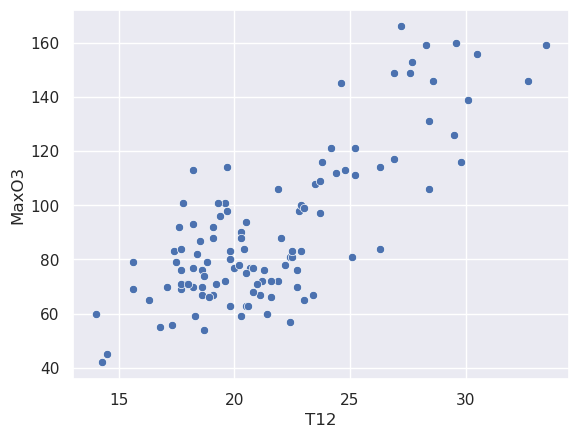

In [32]:
sns.set()

ax = sns.scatterplot(x="T12", y="maxO3", data=data)
ax.set(xlabel='T12', ylabel='MaxO3')
ax.xaxis.set_major_locator(plt.MaxNLocator(5))

*This cloud of points makes us think of an alignment according to a shape which is not very far from a straight line.*


## Correlation Part

### 1. Extract Numerical Data

In [35]:
# select numerical data
numerical_data = data.select_dtypes(include=['int64','float64'])

In [37]:
numerical_data.head()

,obs,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v
0,601,87,15.6,18.5,18.4,4,4,8,0.6946,-1.7101,-0.6946,84
1,602,82,17.0,18.4,17.7,5,5,7,-4.3301,-4.0000,-3.0000,87
2,603,92,15.3,17.6,19.5,2,5,4,2.9544,1.8794,0.5209,82
3,604,114,16.2,19.7,22.5,1,1,0,0.9848,0.3473,-0.1736,92
4,605,94,17.4,20.5,20.4,8,8,7,-0.5000,-2.9544,-4.3301,114


### 2. Correlation Matrix

In [38]:
correlation = numerical_data.corr()

In [39]:
correlation

,obs,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v
obs,1.000000,-0.223712,-0.267973,-0.165728,-0.152408,0.109832,0.159809,0.128487,-0.081878,0.060228,0.126651,-0.255413
maxO3,-0.223712,1.000000,0.699387,0.784262,0.774570,-0.621704,-0.640751,-0.478302,0.527623,0.430796,0.391899,0.684516
T9,-0.267973,0.699387,1.000000,0.882967,0.846446,-0.483864,-0.472248,-0.325139,0.250690,0.222386,0.170322,0.582245
T12,-0.165728,0.784262,0.882967,1.000000,0.946193,-0.584271,-0.660100,-0.458099,0.430104,0.312629,0.270680,0.563629
T15,-0.152408,0.774570,0.846446,0.946193,1.000000,-0.586168,-0.649226,-0.574682,0.453089,0.343751,0.286603,0.567889
Ne9,0.109832,-0.621704,-0.483864,-0.584271,-0.586168,1.000000,0.788341,0.550249,-0.497636,-0.528775,-0.493901,-0.276550
Ne12,0.159809,-0.640751,-0.472248,-0.660100,-0.649226,0.788341,1.000000,0.709867,-0.492658,-0.510320,-0.432269,-0.361923
Ne15,0.128487,-0.478302,-0.325139,-0.458099,-0.574682,0.550249,0.709867,1.000000,-0.401472,-0.431863,-0.378290,-0.308475
Vx9,-0.081878,0.527623,0.250690,0.430104,0.453089,-0.497636,-0.492658,-0.401472,1.000000,0.750177,0.682261,0.340317
Vx12,0.060228,0.430796,0.222386,0.312629,0.343751,-0.528775,-0.510320,-0.431863,0.750177,1.000000,0.837172,0.223675


In [40]:
correlation['maxO3'].sort_values(ascending=False)

maxO3     1.000000
T12       0.784262
T15       0.774570
T9        0.699387
maxO3v    0.684516
Vx9       0.527623
Vx12      0.430796
Vx15      0.391899
obs      -0.223712
Ne15     -0.478302
Ne9      -0.621704
Ne12     -0.640751
Name: maxO3, dtype: float64

#### Correlation matrix for the 8 first highest correlated feacher with max03

Index(['maxO3', 'T12', 'T15', 'T9', 'maxO3v', 'Vx9', 'Vx12', 'Vx15'], dtype='object')


<Axes: >

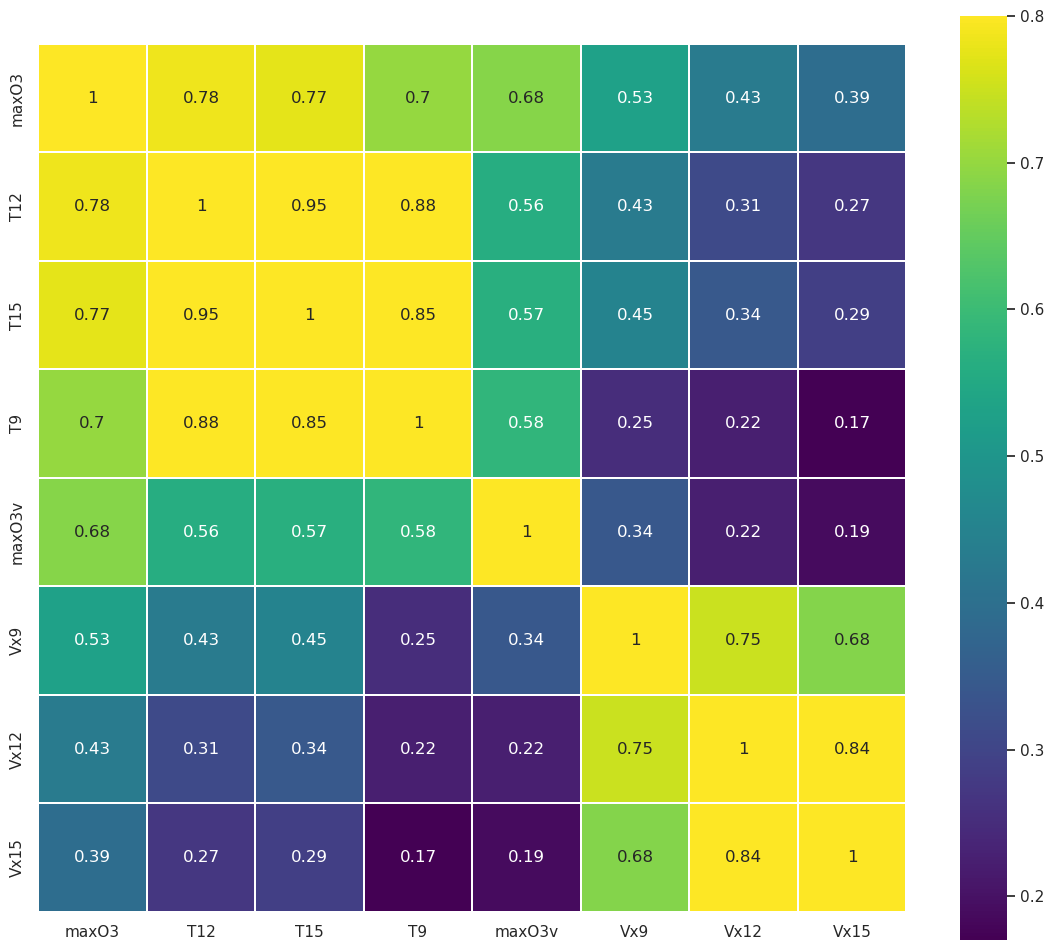

In [44]:
k=8
cols = correlation.nlargest(k,'maxO3')['maxO3'].index
print(cols)
cm = np.corrcoef(numerical_data[cols].values.T)
f,ax = plt.subplots(figsize=(14,12))
sns.heatmap(cm,vmax=0.8,linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels=cols.values,annot_kws={'size':12},
            yticklabels=cols.values)

## Perform a simple linear regression

#### Let's try running a simple linear regression on this scatterplot

In [46]:
import statsmodels.formula.api as smf

In [47]:
reg_simp = smf.ols('maxO3 ~ T12', data=data).fit()

#### Here are the output results of this command:

In [48]:
print(reg_simp.summary())

                            OLS Regression Results                            
Dep. Variable:                  maxO3   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     175.8
Date:                Sun, 17 Dec 2023   Prob (F-statistic):           1.51e-24
Time:                        21:03:01   Log-Likelihood:                -478.91
No. Observations:                 112   AIC:                             961.8
Df Residuals:                     110   BIC:                             967.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -27.4196      9.033     -3.035      0.0

#### Visualize the regression line

/media/maouia/DATA/ProgramFiles/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


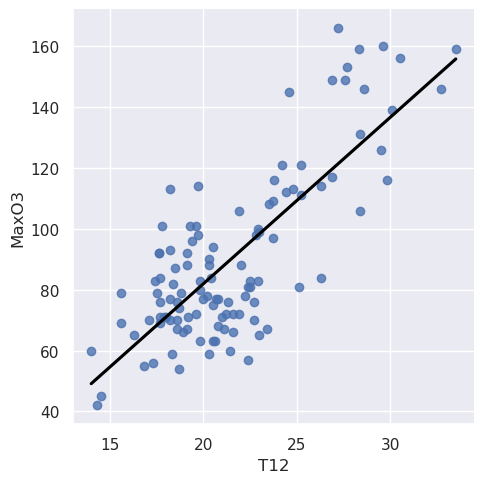

In [49]:
ax = sns.lmplot(x="T12", y="maxO3", data=data, ci=None, line_kws={'color':'black'})
ax.set(xlabel='T12', ylabel='MaxO3')
plt.show()

#### We can also represent the adjusted values according to the observed values

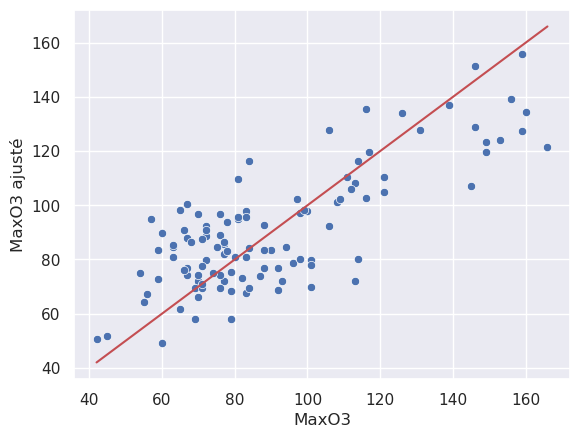

In [50]:
data['maxO3_ajust_s'] = reg_simp.predict()

X_plot = [data['maxO3'].min(), data['maxO3'].max()]

ax = sns.scatterplot(x="maxO3", y="maxO3_ajust_s", data=data)
ax.set(xlabel='MaxO3', ylabel='MaxO3 ajusté')
plt.plot(X_plot, X_plot, color='r')
plt.show()